In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kmapper as km
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import iqr

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001DB36DF6E30>>
Traceback (most recent call last):
  File "c:\Users\Raúl\Documents\MASTER\TFM\env\lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
df_departures = pd.read_pickle("../../calculated_distances_dep.pkl")

df_arrivals = pd.read_pickle("../../calculated_distances_arr.pkl")

print("Columns all:")
print(df_departures.columns.tolist())

Columns all:
['airportCode', 'date', 'deviation', 'delay']


In [ ]:
def fortnight_label(date):
    return f"{date.year}-{date.month:02d}-1" if date.day <= 15 else f"{date.year}-{date.month:02d}-2"

df_departures['half_month'] = df_departures['date'].apply(fortnight_label)

df_dep_by_airport_halfmonth = df_departures.groupby(['airportCode', 'half_month']).agg({
    'deviation': ['mean', 'median', 'std', iqr],
    'delay': ['mean', 'median', 'std', iqr]
}).reset_index()

df_dep_by_airport_halfmonth.columns = ['airportCode', 'half_month',
                                       'deviation_mean', 'deviation_median', 'deviation_std', 'deviation_iqr',
                                       'delay_mean', 'delay_median', 'delay_std', 'delay_iqr']

df_arrivals['half_month'] = df_arrivals['date'].apply(fortnight_label)

df_arr_by_airport_halfmonth = df_arrivals.groupby(['airportCode', 'half_month']).agg({
    'deviation': ['mean', 'median', 'std', iqr],
    'delay': ['mean', 'median', 'std', iqr]
}).reset_index()

df_arr_by_airport_halfmonth.columns = ['airportCode', 'half_month',
                                       'deviation_mean', 'deviation_median', 'deviation_std', 'deviation_iqr',
                                       'delay_mean', 'delay_median', 'delay_std', 'delay_iqr']



df_all_by_airport_halfmonth = pd.merge(df_dep_by_airport_halfmonth, df_arr_by_airport_halfmonth, on=['airportCode', 'half_month'], suffixes=('_dep', '_arr'))



print(df_all_by_airport_halfmonth.head())

print(df_all_by_airport_halfmonth.shape)

  airportCode half_month  deviation_mean_dep  deviation_median_dep  \
0        GCFV  2018-03-2         2488.185867           1659.180216   
1        GCFV  2018-04-1         2318.090052           1534.031653   
2        GCFV  2018-04-2         2291.443504           1388.229475   
3        GCFV  2018-05-1         2203.796263           1205.586969   
4        GCFV  2018-05-2         2356.430540           1268.258685   

   deviation_std_dep  deviation_iqr_dep  delay_mean_dep  delay_median_dep  \
0        2573.510544        2468.373117       -1.643083         -1.166667   
1        2359.001116        2244.387439       -2.190330         -1.783333   
2        2371.457395        2482.837303       -2.064769         -1.850000   
3        2425.667167        2300.633596       -1.963410         -1.166667   
4        2734.139988        2465.465159       -2.348115         -1.700000   

   delay_std_dep  delay_iqr_dep  deviation_mean_arr  deviation_median_arr  \
0       7.813541       8.687500        

In [ ]:
df_dep_by_airport_halfmonth.fillna({'deviation_std': 0.0, 'delay_std': 0.0}, inplace=True)
print(df_dep_by_airport_halfmonth.isna().sum())

print()
df_arr_by_airport_halfmonth.fillna({'deviation_std': 0.0, 'delay_std': 0.0}, inplace=True)
print(df_arr_by_airport_halfmonth.isna().sum())


print()
df_all_by_airport_halfmonth.fillna({'deviation_std_dep': 0.0, 'delay_std_dep': 0.0, 'deviation_std_arr': 0.0, 'delay_std_arr': 0.0}, inplace=True)
print(df_all_by_airport_halfmonth.isna().sum())

airportCode         0
half_month          0
deviation_mean      0
deviation_median    0
deviation_std       0
deviation_iqr       0
delay_mean          0
delay_median        0
delay_std           0
delay_iqr           0
dtype: int64

airportCode         0
half_month          0
deviation_mean      0
deviation_median    0
deviation_std       0
deviation_iqr       0
delay_mean          0
delay_median        0
delay_std           0
delay_iqr           0
dtype: int64

airportCode             0
half_month              0
deviation_mean_dep      0
deviation_median_dep    0
deviation_std_dep       0
deviation_iqr_dep       0
delay_mean_dep          0
delay_median_dep        0
delay_std_dep           0
delay_iqr_dep           0
deviation_mean_arr      0
deviation_median_arr    0
deviation_std_arr       0
deviation_iqr_arr       0
delay_mean_arr          0
delay_median_arr        0
delay_std_arr           0
delay_iqr_arr           0
dtype: int64


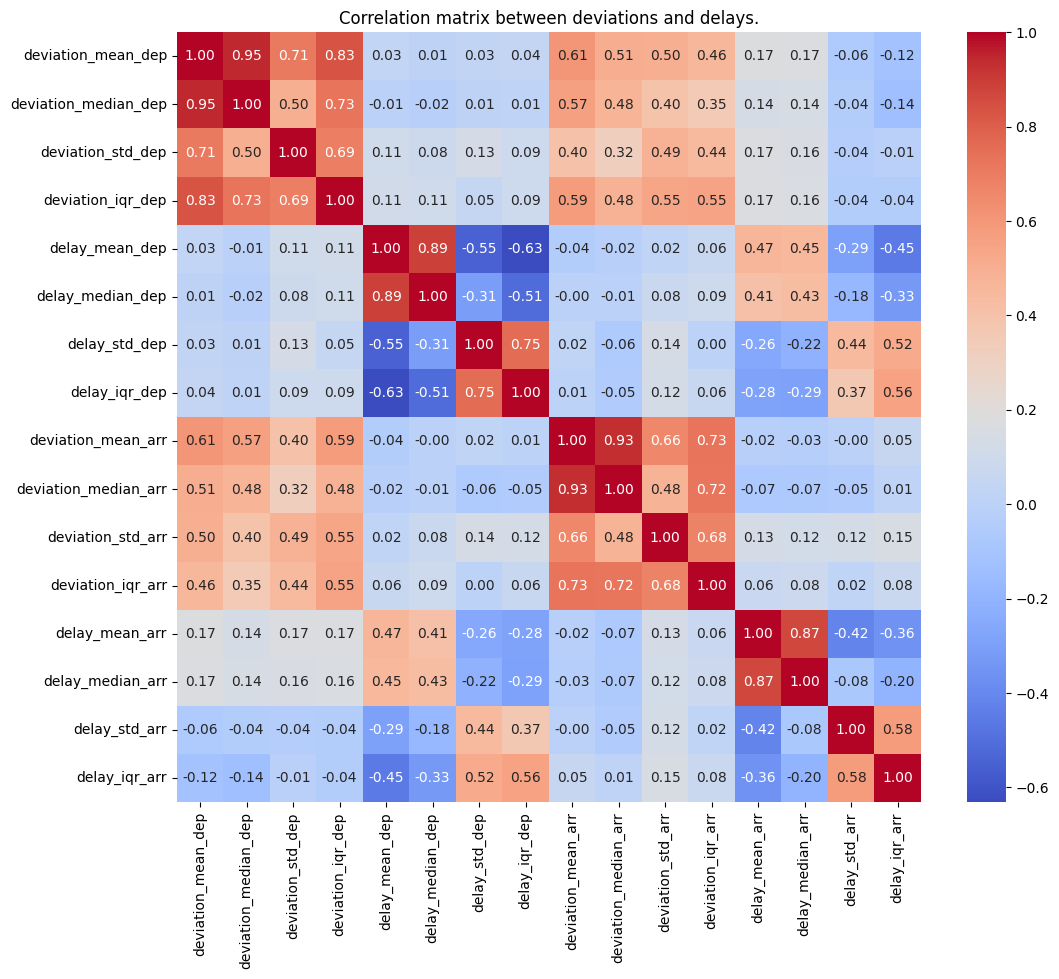

In [ ]:
df_numeric = df_all_by_airport_halfmonth.drop(columns=['airportCode', 'half_month'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix between deviations and delays.")
plt.show()

In [ ]:
X_dep = df_dep_by_airport_halfmonth.drop(columns=['airportCode', 'half_month']).dropna()

print(X_dep.head())
print()

scaler = StandardScaler()
X_scaled_dep = scaler.fit_transform(X_dep)

custom_tooltips_dep = np.array([
    f"{row['half_month']} – {row['airportCode']}" for _, row in df_dep_by_airport_halfmonth.iterrows()
])


print(X_scaled_dep)

   deviation_mean  deviation_median  deviation_std  deviation_iqr  delay_mean  \
0     2488.185867       1659.180216    2573.510544    2468.373117   -1.643083   
1     2318.090052       1534.031653    2359.001116    2244.387439   -2.190330   
2     2291.443504       1388.229475    2371.457395    2482.837303   -2.064769   
3     2203.796263       1205.586969    2425.667167    2300.633596   -1.963410   
4     2356.430540       1268.258685    2734.139988    2465.465159   -2.348115   

   delay_median  delay_std  delay_iqr  
0     -1.166667   7.813541   8.687500  
1     -1.783333   7.708179   9.950000  
2     -1.850000   7.898086   8.700000  
3     -1.166667   6.355845   8.516667  
4     -1.700000   6.647095   8.566667  

[[ 0.89846129  0.36312107  1.49212193 ...  0.26246944 -0.2021041
  -0.01095068]
 [ 0.68355443  0.20005886  1.18491268 ...  0.12962006 -0.21901312
   0.20441156]
 [ 0.64988796  0.01008604  1.20275191 ...  0.11525796 -0.18853592
  -0.00881838]
 ...
 [ 0.96216289  1.01456295

In [ ]:
X_arr = df_arr_by_airport_halfmonth.drop(columns=['airportCode', 'half_month']).dropna()

print(X_arr.head())
print()

scaler = StandardScaler()
X_scaled_arr = scaler.fit_transform(X_arr)

custom_tooltips_arr = np.array([
    f"{row['half_month']} – {row['airportCode']}" for _, row in df_arr_by_airport_halfmonth.iterrows()
])

print(X_scaled_arr)


   deviation_mean  deviation_median  deviation_std  deviation_iqr  delay_mean  \
0     3264.238976       4115.373617    2494.795965    4932.410557   -4.506878   
1     3155.381566       3832.289408    2646.935651    5096.879366   -4.014890   
2     3017.862542       3725.639759    2473.148563    4853.276928   -3.657152   
3     2851.388779       3489.867450    2526.447060    4795.571573   -3.380616   
4     2985.962334       3680.703715    2682.732319    5068.836558   -3.351258   

   delay_median  delay_std  delay_iqr  
0     -4.866667   6.856096  10.941667  
1     -3.900000   7.011440  10.150000  
2     -3.158333   6.897047   9.608333  
3     -2.633333   6.799978   9.950000  
4     -2.441667   6.683127   9.654167  

[[ 2.38414687  3.58371473  1.81492171 ... -0.61036555 -0.19595394
   0.72175555]
 [ 2.23025061  3.22260502  2.04822781 ... -0.4328987  -0.17731482
   0.55822582]
 [ 2.03583423  3.0865599   1.78172543 ... -0.2967388  -0.19104033
   0.44633705]
 ...
 [ 0.92243051  0.7808858

In [ ]:
X_all = df_all_by_airport_halfmonth.drop(columns=['airportCode', 'half_month']).dropna()

print(X_all.head())
print()

scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_all)

custom_tooltips_all = np.array([
    f"{row['half_month']} – {row['airportCode']}" for _, row in df_all_by_airport_halfmonth.iterrows()
])

print(X_scaled_all)

   deviation_mean_dep  deviation_median_dep  deviation_std_dep  \
0         2488.185867           1659.180216        2573.510544   
1         2318.090052           1534.031653        2359.001116   
2         2291.443504           1388.229475        2371.457395   
3         2203.796263           1205.586969        2425.667167   
4         2356.430540           1268.258685        2734.139988   

   deviation_iqr_dep  delay_mean_dep  delay_median_dep  delay_std_dep  \
0        2468.373117       -1.643083         -1.166667       7.813541   
1        2244.387439       -2.190330         -1.783333       7.708179   
2        2482.837303       -2.064769         -1.850000       7.898086   
3        2300.633596       -1.963410         -1.166667       6.355845   
4        2465.465159       -2.348115         -1.700000       6.647095   

   delay_iqr_dep  deviation_mean_arr  deviation_median_arr  deviation_std_arr  \
0       8.687500         3264.238976           4115.373617        2494.795965   
1 

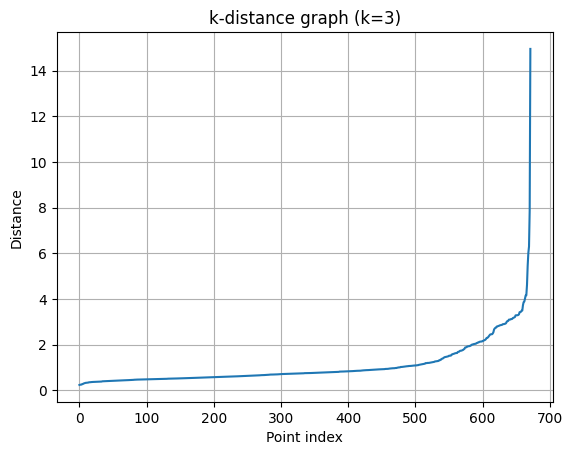

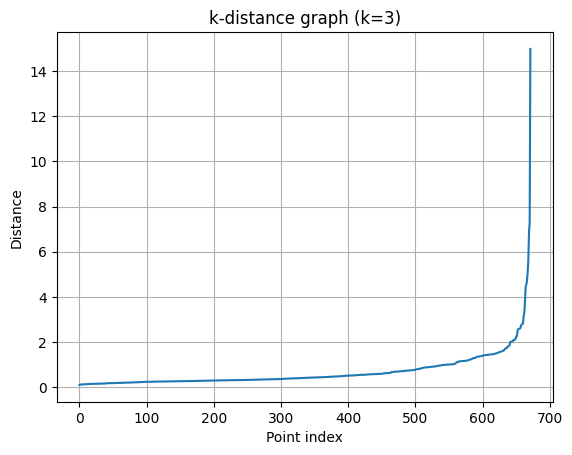

In [ ]:

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled_dep)
distances, indices = neighbors_fit.kneighbors(X_scaled_arr)
distances = np.sort(distances[:, 2])

plt.plot(distances)
plt.title("k-distance graph (k=3)")
plt.xlabel("Point index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled_arr)
distances, indices = neighbors_fit.kneighbors(X_scaled_arr)
distances = np.sort(distances[:, 2])

plt.plot(distances)
plt.title("k-distance graph (k=3)")
plt.xlabel("Point index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:

mapper = km.KeplerMapper()

pca = PCA(n_components=3)
filter_values_dep = pca.fit_transform(X_scaled_dep)

node_color_function_dep = X_scaled_dep[:, X_dep.columns.get_loc("delay_mean")]


graph_dep = mapper.map(filter_values_dep,
                    X_scaled_dep,
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=5, perc_overlap=0.2)
)

mapper.visualize(graph_dep, 
                 path_html="mapper_output_dep.html", 
                 custom_tooltips=custom_tooltips_dep, 
                 node_color_function=node_color_function_dep)

c:\Users\Raúl\Documents\MASTER\TFM\env\lib\site-packages\kmapper\visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
c:\Users\Raúl\Documents\MASTER\TFM\env\lib\site-packages\kmapper\visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [ ]:
pca = PCA(n_components=3)
filter_values_arr = pca.fit_transform(X_scaled_arr)

node_color_function_arr = X_scaled_arr[:, X_arr.columns.get_loc("delay_mean")]


graph_arr = mapper.map(filter_values_arr, 
                    X_scaled_arr,
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=5, perc_overlap=0.2)
)

mapper.visualize(graph_arr, 
                 path_html="mapper_output_arr.html", 
                 custom_tooltips=custom_tooltips_arr, 
                 node_color_function=node_color_function_arr)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [ ]:
pca = PCA(n_components=3)
filter_values_all = pca.fit_transform(X_scaled_all)

node_color_function_all = (
    0.5 * X_scaled_all[:, X_all.columns.get_loc("delay_mean_dep")] +
    0.5 * X_scaled_all[:, X_all.columns.get_loc("delay_mean_arr")]
)

graph_all = mapper.map(filter_values_all, 
                    X_scaled_all,
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=5, perc_overlap=0.2)
)

mapper.visualize(graph_all, 
                 path_html="mapper_output_all.html", 
                 custom_tooltips=custom_tooltips_all,
                 node_color_function=node_color_function_all)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh